In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import util

In [16]:
class Grad_desc(object):
    def __init__(self, step=1e-7, eps=1e-7, alpha0=0.5, c1=0.1, MAX_DESC_ITER=2000):
        '''
        Initialization of optimizator parameters:
        step -  x diff for grad(f) calculation
        eps - tolerance value
        alpha0 - initial Backtracking line search parameter
        c1 - Armijo condition parameter
        MAX_DESC_ITER - iteration limit
        '''
        self.step = step
        self.eps = eps
        self.alpha0 = alpha0
        self.c1 = c1
        self.MAX_DESC_ITER = MAX_DESC_ITER
    
    def optimize(self, func, x0):
        '''
        Parameters:
        xk - current point
        pk - current direction of search
        points - array of passed points
        num_steps - iteration count
        '''
        xk = x0
        pk = -self.grad(func, x0)
        self.points_ = np.array([x0])
        
        self.num_steps_ = 0
        while self.num_steps_ < self.MAX_DESC_ITER:
            alpha_opt = self.line_search(func, xk, pk)

            if alpha_opt == None:
                break

            xk += alpha_opt*pk
            pk = -self.grad(func, xk)
            self.num_steps_ += 1
            self.points_ = np.append(self.points_, [xk], axis=0)

            if np.linalg.norm(alpha_opt*pk) < self.eps:
                break
        return self

    def grad(self, func, x):
        '''
        Gradient calculation
        '''
        return util.grad(func, x, self.step)

    def line_search(self, func, x, direction):
        '''
        Perform line search
        '''
        return util.line_search(func, x, direction, self.step, self.alpha0, self.c1)

    def plot(self, func, x_min, x_max, y_min, y_max, resolution=0.05):
        '''
        Visualizing function and optimization path
        '''
        X = np.arange(x_min, x_max, resolution)
        Y = np.arange(y_min, y_max, resolution)

        X, Y = np.meshgrid(X, Y)
        Z = func(X, Y)
        
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(1, 2, 1, projection='3d')

        ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha=0.5)
        ax.contour(X, Y, Z, zdir='Z', offset=-1, cmap=cm.jet, alpha=0.5)
        ax.plot(self.points_[:,0], self.points_[:,1], func(self.points_[:,0], self.points_[:,1]), '-o', color='black')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")

        ax = fig.add_subplot(1, 2, 2)
        ax.contour(X, Y, Z, levels=50, cmap=cm.jet)
        ax.scatter(self.points_[-1,0], self.points_[-1,1], marker='o', s=50, color='red', zorder=1)
        ax.plot(self.points_[:,0], self.points_[:,1], '-x', zorder=0)
        ax.set_xlabel("x")
        ax.set_ylabel("y")

In [17]:
def main():
    GD = Grad_desc()
    Ros_func = lambda x, y: 100*(y - x**2)**2 + (1 - x)**2
    init = np.array([-4.1, -4.])
    GD.optimize(Ros_func, init)
    GD.plot(Ros_func, x_min=-5, x_max=5, y_min=-5, y_max=5)
    with np.printoptions(precision=5, suppress=True):
        print(f'Minima: [x, y] = {GD.points_[-1]}')
    print(f'Iteration count: {GD.num_steps_}')

Minima: [x, y] = [1.00438 1.00882]
Iteration count: 2000


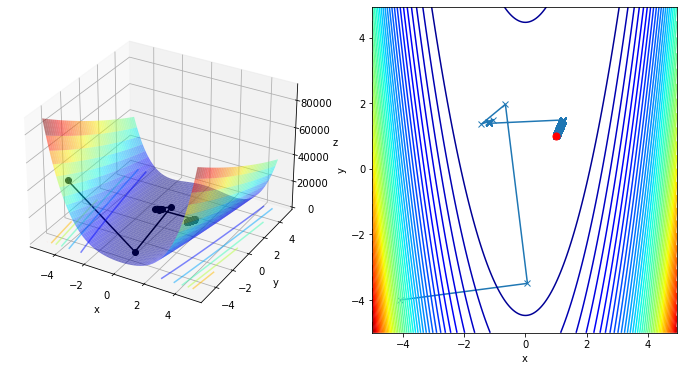

In [18]:
if __name__ == "__main__":
    main()